1. How predictive modeling could be used to inform actions that the City of Chicago might take and suggest any preventative actions.
* To understand the factors that are related to / predictive of the spread of WNV, what modeling choices / evaluation metrics would be most appropriate?


* What additional data might be relevant for understanding this problem?
   - the number of cases of West Nile Virus throughout US or maybe just Chicago,  contribute to where the West Nile Virus would be prevalent
   - travel plays a big role in the transportation of a viral disease and perhaps that data would further strengthen the model or prediction that we make.


* Are there any lessons for future data collection efforts?
 - Not all locations are tested at all times.
 - Records exist only for a particular species of mosquitos found in the traps.
 - There is incomplete data at times. Data is imperfect.

* What weather conditions would we expect to impact mosquito populations? How would you investigate this using this data?

1. Where outbreaks will take place?
2. Where should we be implementing mosquito control/virus prevention/preperation?


the most important feature, both weather data and sprayinng data will be important because it can provide some insight on how to determine the probabilitites of the virus. This points us in the right direction to go to rather than to base it on solely the number of infected mosquitos in a location alone.

 really wouldn't think the model needs to be super complicated. In particular, we need a way to determine the number of mosquitos in a given area, whether they are infected or not, and then translating that into a probabilitiy (0 - 1).

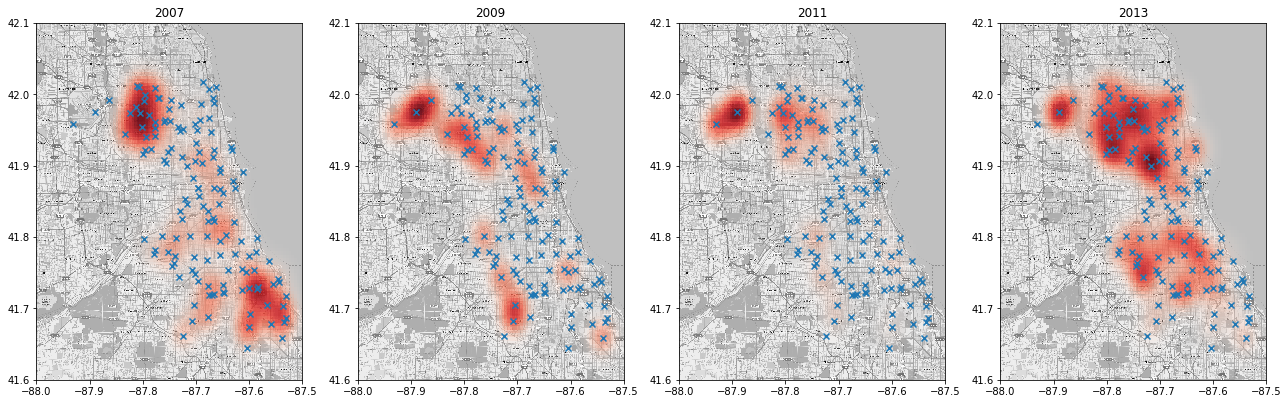

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
%matplotlib inline

from sklearn.neighbors import KernelDensity
data_path = "/Users/qiaolinchen/Documents/data_challenge/sparkbeyond/data/"
mapdata = np.loadtxt(data_path + "mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv(data_path  +'train.csv', parse_dates=['Date'])[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

pl.figure(figsize=(18,8))
for year, subplot in zip([2007, 2009, 2011, 2013], [141, 142, 143, 144]):
    sightings = traps[(traps['WnvPresent'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    pl.subplot(subplot)
    pl.gca().set_title(year)
    pl.imshow(mapdata, 
               cmap=pl.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    pl.scatter(locations[:,0], locations[:,1], marker='x')

#https://www.kaggle.com/neilsummers/west-nile-heatmap-by-year/code

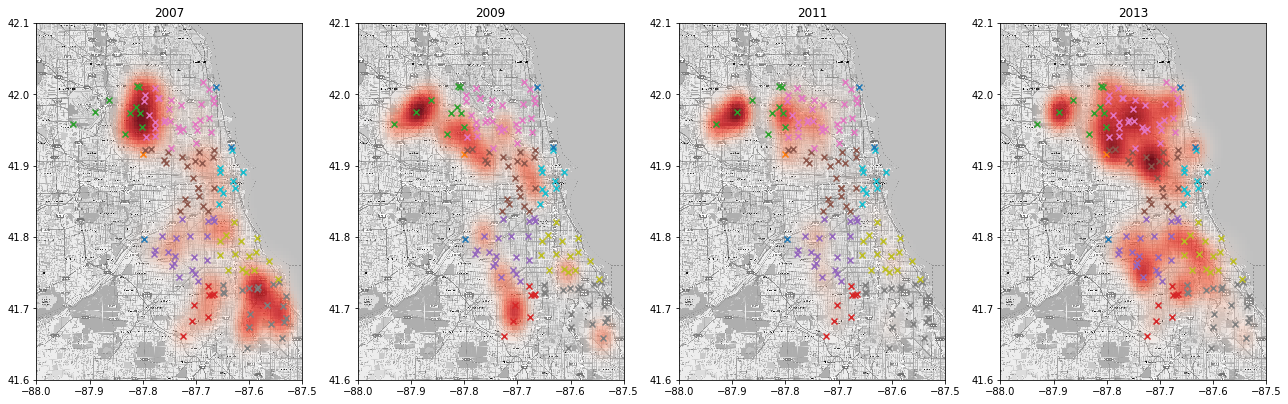

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
%matplotlib inline

from sklearn.neighbors import KernelDensity
data_path = "/Users/qiaolinchen/Documents/data_challenge/sparkbeyond/data/"
mapdata = np.loadtxt(data_path + "mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv(data_path  +'train.csv', parse_dates=['Date'])[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

pl.figure(figsize=(18,8))
for year, subplot in zip([2007, 2009, 2011, 2013], [141, 142, 143, 144]):
    sightings = traps[(traps['WnvPresent'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    pl.subplot(subplot)
    pl.gca().set_title(year)
    pl.imshow(mapdata, 
               cmap=pl.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.tight_layout()
    #------------------------------------------------------------
    min_lat   = min( traps['Latitude']);     max_lat= max(traps['Latitude']) 
    min_long  = min( traps['Longitude']);  max_long = max(traps['Longitude']) 
    lat_list  = np.linspace(start = min_lat,  stop= max_lat , num= 5).tolist()
    long_list = np.linspace(start = min_long, stop= max_long , num= 4).tolist()  
    
    def lat_grid(lat):
        lat_group = None
        for i in range(0,4):       # loop through 4 lattitude intervals
            if (lat >= lat_list[i] and lat<= lat_list[i+1] ):
                return(i+1 ) 

    def long_grid(long):
        for j in range(0,3):   # loop through 3 longitude intervals
            if (long >= long_list[j] and long <= long_list[j+1]):
                return (j+1 )
            
    lat_group  = list(map(lat_grid, traps['Latitude']))
    long_group = list(map(long_grid, traps['Longitude']))   
    traps['lat_long'] = [ str(x) +'_'+str(y) for x, y in zip(long_group, lat_group)]
    
    locations = traps[['Longitude', 'Latitude','lat_long']].drop_duplicates().groupby('lat_long')
    for label, df in locations:
        pl.scatter(df['Longitude'], df['Latitude'], marker='x', label=label)

#https://www.kaggle.com/neilsummers/west-nile-heatmap-by-year/code